In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

sys.path.append('../')

from src_experiment import NeuralNet, moon_path, wbc_path, get_moons_data, get_wbc_data, train_model
from geobin import RegionTree, TreeNode

In [2]:
hidden_sizes = [6,6,6]
num_classes = 1
model = NeuralNet(
    input_size = 30,
    hidden_sizes = hidden_sizes,
    num_classes = num_classes,
)


# Data
train_data, test_data = get_wbc_data(label_noise=0.0, batch_size=32)

epochs = 50
save_for_epochs = [0,3,6,9,15,25,35,49]


In [3]:
res, states = train_model(
    model=model,
    train_data = train_data,
    test_data = test_data,
    epochs = epochs,
    # save_everyth_epoch = 20,
    save_for_epochs=save_for_epochs,
    RETURN_STATES=True,
)

Training not saved.


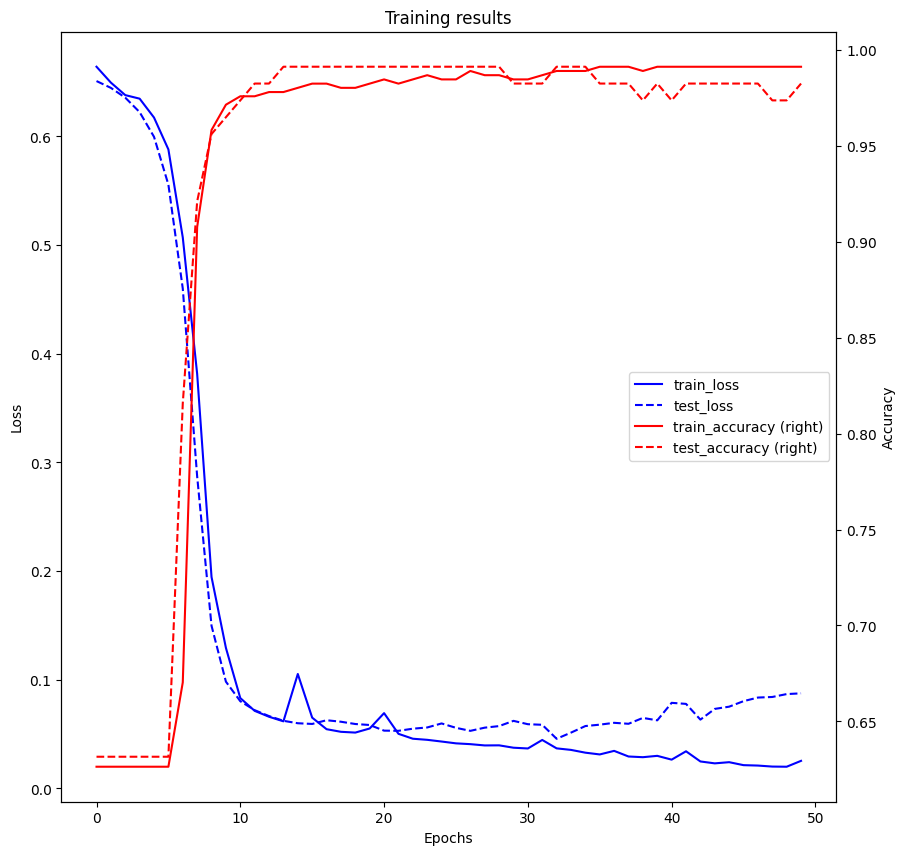

In [4]:
from visualization import plot_training
plot_training(res)

In [5]:
states[0]

OrderedDict([('l1.weight',
              tensor([[-0.0972, -0.0723, -0.1663,  0.0806, -0.0441,  0.0928, -0.1345,  0.1153,
                        0.1742, -0.1534, -0.0961,  0.1626, -0.1123, -0.0916, -0.1471,  0.1761,
                        0.1104, -0.0939, -0.0957, -0.0087, -0.1226, -0.1060, -0.1067,  0.1477,
                        0.1185,  0.0333, -0.0197, -0.1341, -0.0560, -0.1486],
                      [ 0.1310,  0.1793,  0.0803, -0.0328, -0.0762,  0.0277,  0.1155,  0.1505,
                       -0.1058, -0.0414, -0.0461, -0.1109,  0.0808, -0.0664,  0.0771, -0.0738,
                       -0.0403,  0.1057, -0.0807,  0.1267,  0.0020,  0.1356,  0.0885,  0.1395,
                       -0.0551, -0.0122,  0.0357, -0.1470,  0.1764, -0.0371],
                      [ 0.1096,  0.1075, -0.0459,  0.1268, -0.1686, -0.0965,  0.1286,  0.1399,
                       -0.1778,  0.0212, -0.1754, -0.0696,  0.0807, -0.0775, -0.0997,  0.0165,
                        0.1487,  0.0411,  0.0918, -0.1049

In [6]:
# import torch
ncounts_per_epoch = {}
total_times = []
building_times = []
passing_times = []
for epoch in [0,15,49]:
    start = time.time()
    # state_dict = torch.load(states[epoch])
    tree = RegionTree(states[epoch])
    tree.build_tree(verbose=False, check_feasibility=True)
    intermediate = time.time()
    tree.pass_dataloader_through_tree(train_data)
    tree.collect_number_counts()
    ncounts_per_epoch[epoch] = tree.get_number_counts()
    # print(tree.size)
    end = time.time()
    total_time = end-start
    building_time = intermediate-start
    passing_time = end-intermediate
    
    total_times.append(total_time)
    building_times.append(building_time)
    passing_times.append(passing_time)
    print(f"\nEpoch: {epoch}")
    print(f"Total time taken:    {total_time:.3f} s")
    print(f"Time building:       {building_time:.3f} s")
    print(f"Time passing:        {passing_time:.3f} s")
total_time = sum(total_times)




Epoch: 0
Total time taken:    57.376 s
Time building:       57.295 s
Time passing:        0.081 s

Epoch: 15
Total time taken:    26.626 s
Time building:       26.572 s
Time passing:        0.054 s

Epoch: 49
Total time taken:    21.864 s
Time building:       21.802 s
Time passing:        0.062 s


In [7]:
tree.get_number_counts()

,layer_idx,region_idx,1,0,total
1,1,0,16.0,0.0,16.0
2,2,0,15.0,0.0,15.0
3,3,0,15.0,0.0,15.0
4,4,0,15.0,0.0,15.0
5,3,1,0.0,0.0,0.0
...,...,...,...,...,...
3834,2,498,2.0,0.0,2.0
3835,2,499,0.0,0.0,0.0
3836,2,500,0.0,0.0,0.0
3837,2,501,0.0,1.0,1.0


In [8]:
print(total_time)

105.86657547950745


In [9]:
ncounts_per_epoch

{0:        layer_idx  region_idx     1    0  total
 1              1           0  15.0  0.0   15.0
 2              2           0   6.0  0.0    6.0
 3              3           0   0.0  0.0    0.0
 4              4           0   0.0  0.0    0.0
 5              3           1   0.0  0.0    0.0
 ...          ...         ...   ...  ...    ...
 10573          4        5381   0.0  0.0    0.0
 10574          3        4262   0.0  0.0    0.0
 10575          4        5382   0.0  0.0    0.0
 10576          3        4263   0.0  0.0    0.0
 10577          4        5383   0.0  0.0    0.0
 
 [10577 rows x 5 columns],
 15:       layer_idx  region_idx     1    0  total
 1             1           0  69.0  0.0   69.0
 2             2           0  54.0  0.0   54.0
 3             3           0  54.0  0.0   54.0
 4             4           0  54.0  0.0   54.0
 5             3           1   0.0  0.0    0.0
 ...         ...         ...   ...  ...    ...
 4694          3        1790   0.0  0.0    0.0
 4695       

In [10]:
e0 = ncounts_per_epoch[49]

In [11]:
print(len(e0))
print(len(e0[e0["total"]>0]))

3838
137


In [12]:
ncounts_per_epoch[0]["total"].sum()

np.float64(1549.0)

In [ ]:
ncounts_per_epoch[15]["total"].sum()

np.float64(989.0)

In [ ]:
ncounts_per_epoch[49]["total"].sum()

np.float64(967.0)

In [15]:
from src_experiment import DivergenceEngine, QUANTITIES_TO_ESTIMATE
from typing import Dict, List
class EstimateQuantities1Run:
    """
    Experiment-specific wrapper that:
    - loads number counts
    - loops over epochs
    - delegates all math to DivergenceEngine
    """

    def __init__(
        self,
        ncounts
    ):
        self.ncounts = ncounts

        self.estimates: Dict[str, List[pd.DataFrame]] = {
            q: [] for q in QUANTITIES_TO_ESTIMATE
        }

        # Perform calculations
        self.calculate_estimates()

    # ------------------------------------------------------------------

    def calculate_estimates(self) -> None:
        for epoch, frame in self.ncounts.items():
            engine = DivergenceEngine(frame)
            epoch_results = engine.compute()

            for key, df in epoch_results.items():
                df.insert(0, "epoch", epoch)
                self.estimates[key].append(df)

        # Concatenate epochs
        for key, frames in self.estimates.items():
            self.estimates[key] = (
                pd.concat(frames, ignore_index=True)
                .rename_axis(None, axis=1)
            )

    def get_estimates(self) -> Dict[str, pd.DataFrame]:
        return self.estimates


In [16]:
est1 = EstimateQuantities1Run(ncounts_per_epoch)

AssertionError: 

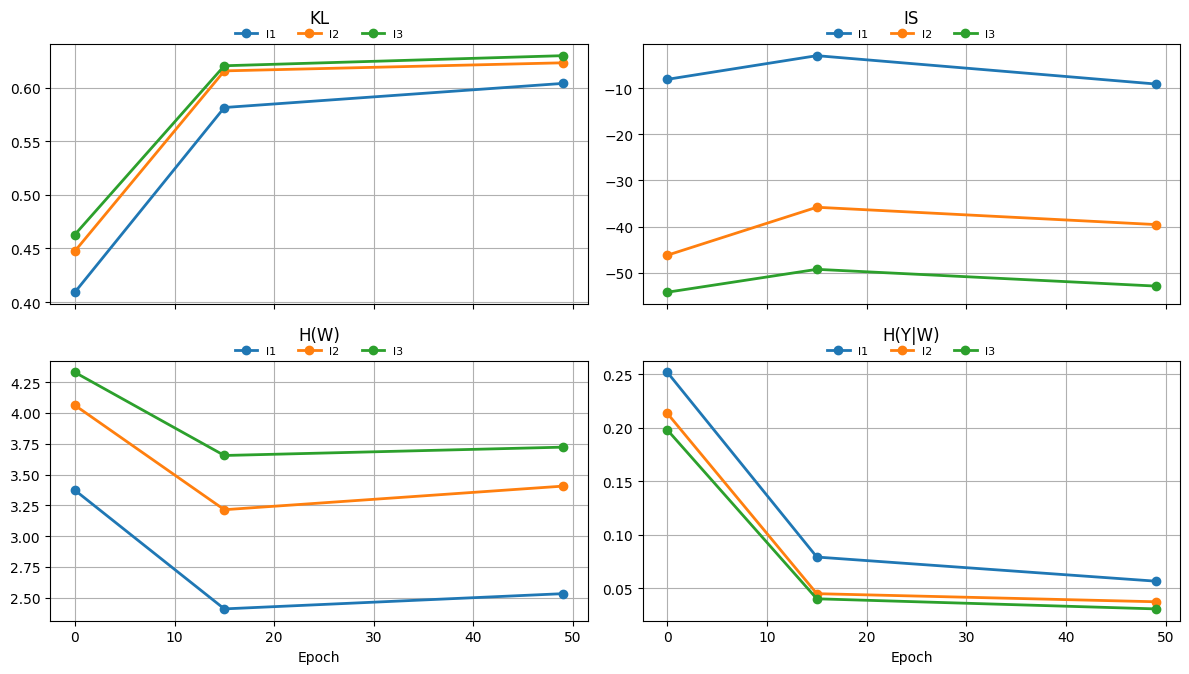

In [ ]:
from visualization import plot_all_quantities
plot_all_quantities(est1.get_estimates())